In [1]:
#precision is really important here 
#precision is number of true positives over number of predicted positives

#Interpretation: High precision means the model is good at minimizing false positives—it 
#doesn’t falsely label a negative as a positive (which overlaps with specificity).

#(true pos)/ (

In [2]:
#specificity is actaully the most important here (true negative rate)

#calculated by (true negative)/ (true negative + false positives)

#Specificity is the proportion of actual negatives that are correctly identified by the model as negative. 
#In other words, it measures the model's ability to correctly identify the negative class (i.e., the true negatives).

#Interpretation: High specificity means the model is good at avoiding false positives (it is not incorrectly
#classifying negatives as positives).

#Specificity refers to how well the model avoids false positives and correctly classifies negative cases (TN).

#If you say that specificity is more important, you're emphasizing the importance of minimizing false 
#positives and ensuring that the negative class is correctly identified. This is not the same as precision or recall:

In [3]:
#should try to equalize the data proportions through SMOTE and undersampling
"""
1) find size of train set 
2) find existing proprtion of target beans
3) smote enough to bring this up to around 50% of the train size
4) randomly undersample the negatives to select roughly the other 50%
5) combine the the two to make your new train set

"""

'\n1) find size of train set \n2) find existing proprtion of target beans\n3) smote enough to bring this up to around 50% of the train size\n4) randomly undersample the negatives to select roughly the other 50%\n5) combine the the two to make your new train set\n\n'

In [4]:
def precision(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

In [5]:
import pandas as pd

In [6]:
bean_df= pd.read_excel('my_data/Dry_Bean_Dataset.xlsx')
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [7]:
bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [8]:
#column information and dataset taken from
#https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
#column information
"""
1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
2.) Perimeter (P): Bean circumference is defined as the length of its border.
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5.) Aspect ratio (K): Defines the relationship between L and l.
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12.)Compactness (CO): Measures the roundness of an object: Ed/L
13.)ShapeFactor1 (SF1)
14.)ShapeFactor2 (SF2)
15.)ShapeFactor3 (SF3)
16.)ShapeFactor4 (SF4)
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)
"""

'\n1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.\n2.) Perimeter (P): Bean circumference is defined as the length of its border.\n3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.\n4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.\n5.) Aspect ratio (K): Defines the relationship between L and l.\n6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.\n7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.\n8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.\n9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.\n10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.\n11.)Roundness (R): Calculated with the 

In [9]:
bean_df['Class'].value_counts(normalize=True)

Class
DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: proportion, dtype: float64

In [10]:
#dermason is the most present and will become the taget class.
#apply a lambda function to the target class, creating a new column that
#tells us if each instance is or isn't a 'DERMASON' bean or isn't
#via 0 if it is not and 1 if it is.

In [11]:
bean_df['Dermason?']= bean_df['Class'].apply(lambda x: 1 if x == 'DERMASON' else 0) 

In [12]:
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Dermason?
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,0


In [13]:
bean_df['Dermason?'].value_counts(normalize=True)

Dermason?
0    0.739475
1    0.260525
Name: proportion, dtype: float64

In [14]:
#import some relative libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from numbers import Number
from sklearn.tree import DecisionTreeClassifier

In [15]:
#split the data up using train test split
X= bean_df.drop(['Dermason?','Class'], axis = 1)
y= bean_df['Dermason?']

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 24, test_size= 0.3)

In [16]:
#start out with a baseline decision tree classifier
#train the classifier
dt1 = DecisionTreeClassifier(random_state= 24) #dt1 is decision tree #1
dt1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=24)

In [17]:
#make predictions on the test set using the base decision tree classifier
#use AUC to calculate predictive performance
y_pred_dt1= dt1.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_dt1)
roc_auc_dt1 = auc(false_positive_rate, true_positive_rate)
roc_auc_dt1

0.9213740607197647

In [18]:
#now let's compare this model to a baseline logidtic regresison model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
#lr1 is logistic regression #1
lr1 = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')
lr1.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, random_state=24,
                   solver='liblinear')

In [21]:
#make predictions on the test set using the base decision tree classifier
#use AUC to calculate predictive performance
y_pred_lr1= lr1.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_lr1)
roc_auc_lr1 = auc(false_positive_rate, true_positive_rate)
roc_auc_lr1

0.8825490526583217

In [22]:
"""

other possible 1 vs all regressions:
Naive bayes
Random Forest
K-Nearest Neighbors


"""

'\n\nother possible 1 vs all regressions:\nNaive bayes\nRandom Forest\nK-Nearest Neighbors\n\n\n'

In [23]:
#lets try a random forest classifier base model
from sklearn.ensemble import RandomForestClassifier

rf1= RandomForestClassifier(random_state= 24) #rf1 is random forest #1
rf1.fit(X_train, y_train)

y_pred_rf1 = rf1.predict_proba(X_test)[:, 1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf1)
roc_auc_rf1 = auc(false_positive_rate, true_positive_rate)
roc_auc_rf1

0.9916985460088529

In [24]:
#lets try a K-Nearest Neighbors classifier base model
from sklearn.neighbors import KNeighborsRegressor

knn1= KNeighborsRegressor(n_neighbors=5)
knn1.fit(X_train, y_train)

y_pred_knn1= knn1.predict(X_test) 

# Step 6: Convert regression output to binary classification (using a threshold, e.g., median of y_test)
threshold = np.median(y_test)  # You could choose a custom threshold as well
y_pred_class_knn1 = (y_pred_knn1 > threshold).astype(int)  # Convert continuous predictions to binary

auc_knn1 = roc_auc_score((y_test > threshold).astype(int), y_pred_class_knn1)
auc_knn1

0.8918746763208552

In [25]:
#right now decision tree and random forrest have the best auc score but could be dues to overfitting. 
#let's check these scores with cross validation

In [26]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.base import clone

In [27]:
dt1 = DecisionTreeClassifier(random_state= 24)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
dt1_baseline_neg_log_loss_cv = cross_val_score(dt1, X_train, y_train, scoring="neg_log_loss")

dt1_baseline_log_loss = -(dt1_baseline_neg_log_loss_cv.mean())
dt1_baseline_log_loss

2.111110827061766

In [28]:
from sklearn.metrics import log_loss

log_loss(y_train, np.zeros(len(y_train)))

9.269124677583399

In [29]:
#lets check out the log loss of the logistic regresison model 
# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
lr1_baseline_neg_log_loss_cv = cross_val_score(lr1, X_train, y_train, scoring="neg_log_loss")

lr1_baseline_log_loss = -(lr1_baseline_neg_log_loss_cv.mean())
lr1_baseline_log_loss

0.17333680048338257

In [30]:
#Make some cross validation test sets for the logistic regression 

In [31]:
# Negative log loss doesn't exist as something we can import,
# but we can create it
neg_log_loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Instantiate the model (same as previous example)
lr_baseline_model = lr1

# Create a list to hold the score from each fold
kfold_scores = np.ndarray(5)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
lr_baseline_neg_log_loss_cv = cross_val_score(lr_baseline_model, X_train, y_train, scoring="neg_log_loss")

# Instantiate a splitter object and loop over its result
kfold = StratifiedKFold()
for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
    # Extract train and validation subsets using the provided indices
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Clone the provided model and fit it on the train subset
    temp_model = clone(lr_baseline_model)
    temp_model.fit(X_t, y_t)
    
    # Evaluate the provided model on the validation subset
    neg_log_loss_score = neg_log_loss(temp_model, X_val, y_val)
    kfold_scores[fold] = neg_log_loss_score
    
print(f"baseline LR neg log loss score: {-lr_baseline_neg_log_loss_cv.mean()}")
print(f"validation LR neg log loss score: {-kfold_scores.mean()}")

baseline LR neg log loss score: 0.17333680048338257
validation LR neg log loss score: 0.17333680048338257


In [32]:
#make a cross validation test set for decision tree
# Negative log loss doesn't exist as something we can import,
# but we can create it
neg_log_loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Instantiate the model (same as previous example)
dt_baseline_model = dt1

# Create a list to hold the score from each fold
kfold_scores = np.ndarray(5)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
dt_baseline_neg_log_loss_cv = cross_val_score(dt_baseline_model, X_train, y_train, scoring="neg_log_loss")

# Instantiate a splitter object and loop over its result
kfold = StratifiedKFold()
for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
    # Extract train and validation subsets using the provided indices
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Clone the provided model and fit it on the train subset
    temp_model = clone(dt_baseline_model)
    temp_model.fit(X_t, y_t)
    
    # Evaluate the provided model on the validation subset
    neg_log_loss_score = neg_log_loss(temp_model, X_val, y_val)
    kfold_scores[fold] = neg_log_loss_score
    
print(f"baseline DT neg log loss score: {-dt_baseline_neg_log_loss_cv.mean()}")
print(f"validation DT neg log loss score: {-kfold_scores.mean()}")

baseline DT neg log loss score: 2.111110827061766
validation DT neg log loss score: 2.111110827061766


In [33]:
#lets mess around with some preprocessing

In [34]:
#start out with stanbdard scaler

In [35]:
#logistic regression 

In [36]:
# Import relevant sklearn and imblearn classes
from sklearn.preprocessing import StandardScaler

def custom_cross_val_score(estimator, X, y):
    # Create a list to hold the scores from each fold
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)

    # Instantiate a splitter object and loop over its result
    kfold = StratifiedKFold(n_splits=5)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        # Extract train and validation subsets using the provided indices
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Instantiate StandardScaler
        scaler = StandardScaler()
        # Fit and transform X_t
        X_t_scaled = scaler.fit_transform(X_t)
        # Transform X_val
        X_val_scaled = scaler.transform(X_val)
        
        # Clone the provided model and fit it on the train subset
        temp_model = clone(estimator)
        temp_model.fit(X_t_scaled, y_t)
        
        # Evaluate the provided model on the train and validation subsets
        neg_log_loss_score_train = neg_log_loss(temp_model, X_t_scaled, y_t)
        neg_log_loss_score_val = neg_log_loss(temp_model, X_val_scaled, y_val)
        kfold_train_scores[fold] = neg_log_loss_score_train
        kfold_val_scores[fold] = neg_log_loss_score_val
        
    return kfold_train_scores, kfold_val_scores

model_with_preprocessing = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')
preprocessed_train_scores, preprocessed_neg_log_loss_cv = custom_cross_val_score(model_with_preprocessing, X_train, y_train)

print(f"baseline LR neg log loss score: {-lr_baseline_neg_log_loss_cv.mean()}")
print(f"preprocessed validation LR neg log loss score: {-preprocessed_neg_log_loss_cv.mean()}")

baseline LR neg log loss score: 0.17333680048338257
preprocessed validation LR neg log loss score: 0.17498147673509248


In [37]:
#on the logistic regression is seems the standardization has reulted in the classification worsening
#this points to overfitting

In [38]:
#now try it with the decision tree
model_with_preprocessing = DecisionTreeClassifier(random_state= 24)
preprocessed_train_scores, preprocessed_neg_log_loss_cv = custom_cross_val_score(model_with_preprocessing, X_train, y_train)

print(f"baseline DT neg log loss score: {-dt_baseline_neg_log_loss_cv.mean()}")
print(f"preprocessed validation DT neg log loss score: {-preprocessed_neg_log_loss_cv.mean()}")

baseline DT neg log loss score: 2.111110827061766
preprocessed validation DT neg log loss score: 2.111110827061766


In [39]:
#normalization does not seem to affect the decision tree as hypothesized

# let's run it again but this time use specificity as the rate for success

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
#split the data up using train test split
X= bean_df.drop(['Dermason?','Class'], axis = 1)
y= bean_df['Dermason?']

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 24, test_size= 0.3)

In [42]:
#decision Tree base model

#start out with a baseline decision tree classifier
#train the classifier
dt1 = DecisionTreeClassifier(random_state= 24) #dt1 is decision tree #1
dt1.fit(X_train, y_train)

#make predictions on the test set using the base decision tree classifier
#use AUC to calculate predictive performance
y_pred_dt1= dt1.predict(X_test)

#make the confusion matrix
dt1_cm= confusion_matrix(y_test, y_pred_dt1)

#extract the prediction scores from the confusion matrix
TN, FP, FN, TP= dt1_cm.ravel()

#calculate the specificity (true negative rate)
dt1_specificity = TN / (TN + FP)

# Print the confusion matrix and specificity rounded to 4 decimals
print("Confusion Matrix:")
print(dt1_cm)
print(f"Specificity: {dt1_specificity:.6}")

Confusion Matrix:
[[2878  110]
 [ 132  964]]
Specificity: 0.963186


In [43]:
#logistic regression base model


lr1 = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')
lr1.fit(X_train, y_train)

#make predictions on the test set using the base decision tree classifier
#use AUC to calculate predictive performance
y_pred_lr1= lr1.predict(X_test)

#make the confusion matrix
lr1_cm= confusion_matrix(y_test, y_pred_lr1)

#extract the prediction scores from the confusion matrix
TN, FP, FN, TP= lr1_cm.ravel()

#calculate the specificity (true negative rate)
lr1_specificity = TN / (TN + FP)

# Print the confusion matrix and specificity rounded to 4 decimals
print("Confusion Matrix:")
print(lr1_cm)
print(f"Specificity: {lr1_specificity:.6}")

Confusion Matrix:
[[2845  143]
 [ 205  891]]
Specificity: 0.952142


# make the cross validation models for specificity

In [44]:
from sklearn.metrics import make_scorer

In [45]:
#Define a function to calculate specificity from confusion matrix
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, (y_pred > 0.5).astype(int))
    TN = cm[0, 0]  # True Negatives
    FP = cm[0, 1]  # False Positives
    return TN / (TN + FP)

#Create a custom scorer using make_scorer for specificity
specificity_scorer = make_scorer(specificity_score)

In [46]:
#logistic regression cross validation

# Instantiate the model (same as previous example)
lr_baseline_model = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')

# Create a list to hold the score from each fold
kfold_scores = np.ndarray(5)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
lr_baseline_specificity_cv = cross_val_score(lr_baseline_model, X_train, y_train, scoring= specificity_scorer)

# Instantiate a splitter object and loop over its result
kfold = StratifiedKFold()
for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
    # Extract train and validation subsets using the provided indices
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Clone the provided model and fit it on the train subset
    temp_model = clone(lr_baseline_model)
    temp_model.fit(X_t, y_t)

    # Predict probabilities on the validation set
    y_pred_proba = temp_model.predict_proba(X_val)[:, 1]

    # Calculate specificity score for the fold
    specificity = specificity_score(y_val, y_pred_proba)
    kfold_scores[fold] = specificity

print(f"baseline LR specificity score: {lr_baseline_specificity_cv.mean()}")
print(f"validation LR specificity score: {kfold_scores.mean()}")

baseline LR specificity score: 0.9559124393603641
validation LR specificity score: 0.9559124393603641


In [47]:
#decision tree cross validation

# Instantiate the model (same as previous example)
dt_baseline_model = DecisionTreeClassifier(random_state= 24)

# Create a list to hold the score from each fold
kfold_scores = np.ndarray(5)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
dt_baseline_specificity_cv = cross_val_score(dt_baseline_model, X_train, y_train, scoring= specificity_scorer)

# Instantiate a splitter object and loop over its result
kfold = StratifiedKFold()
for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
    # Extract train and validation subsets using the provided indices
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Clone the provided model and fit it on the train subset
    temp_model = clone(dt_baseline_model)
    temp_model.fit(X_t, y_t)

    # Predict probabilities on the validation set
    y_pred_proba = temp_model.predict_proba(X_val)[:, 1]

    # Calculate specificity score for the fold
    specificity = specificity_score(y_val, y_pred_proba)
    kfold_scores[fold] = specificity

print(f"baseline DT specificity score: {dt_baseline_specificity_cv.mean()}")
print(f"validation DT specificity score: {kfold_scores.mean()}")

baseline DT specificity score: 0.9608585374618194
validation DT specificity score: 0.9608585374618194


# specificity preprocessing function with standardization


In [48]:
#modified
# Import relevant sklearn and imblearn classes

def stand_custom_cross_val_score(estimator, X, y):
    # Create a list to hold the scores from each fold
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)

    # Instantiate a splitter object and loop over its result
    kfold = StratifiedKFold(n_splits=5)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        # Extract train and validation subsets using the provided indices
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Instantiate StandardScaler
        scaler = StandardScaler()
        # Fit and transform X_t
        X_t_scaled = scaler.fit_transform(X_t)
        # Transform X_val
        X_val_scaled = scaler.transform(X_val)
        
        # Clone the provided model and fit it on the train subset
        temp_model = clone(estimator)
        temp_model.fit(X_t_scaled, y_t)

        #Predict probabilities on the train and validation sets
        y_pred_train_proba = temp_model.predict_proba(X_t_scaled)[:, 1]
        y_pred_val_proba = temp_model.predict_proba(X_val_scaled)[:, 1]

        # Calculate specificity for train and validation sets
        specificity_train = specificity_score(y_t, y_pred_train_proba)
        specificity_val = specificity_score(y_val, y_pred_val_proba)

        # Store the specificity scores
        kfold_train_scores[fold] = specificity_train
        kfold_val_scores[fold] = specificity_val
        
    return kfold_train_scores, kfold_val_scores
    

In [49]:
# Instantiate the Logistic Regression model (with preprocessing)
lr_model_with_preprocessing = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')

# Perform custom cross-validation and get specificity scores
preprocessed_train_scores, preprocessed_val_scores = stand_custom_cross_val_score(lr_model_with_preprocessing, X_train, y_train)

print(f"Average specificity score on LR standardized train data: {preprocessed_train_scores.mean()}")
print(f"Average specificity score on LR standardized validation data: {preprocessed_val_scores.mean()}")

Average specificity score on LR standardized train data: 0.9337996171416082
Average specificity score on LR standardized validation data: 0.9318912579106027


In [50]:
# Instantiate the Logistic Regression model (with preprocessing)
dt_model_with_preprocessing = DecisionTreeClassifier(random_state= 24)

# Perform custom cross-validation and get specificity scores
preprocessed_train_scores, preprocessed_val_scores = stand_custom_cross_val_score(dt_model_with_preprocessing, X_train, y_train)

print(f"Average specificity score on DT standardized train data: {preprocessed_train_scores.mean()}")
print(f"Average specificity score on DT standardized validation data: {preprocessed_val_scores.mean()}")

Average specificity score on DT standardized train data: 1.0
Average specificity score on DT standardized validation data: 0.9608585374618194


### standardization does not help, delete it

# try normalization on the logistic regression but not the decision tree

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
def norm_custom_cross_val_score(estimator, X, y):
    # Create a list to hold the scores from each fold
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)

    # Instantiate a splitter object and loop over its result
    kfold = StratifiedKFold(n_splits=5)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        # Extract train and validation subsets using the provided indices
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Instantiate MinMaxScaler for normalization
        scaler = MinMaxScaler()
        # Fit and transform X_t
        X_t_scaled = scaler.fit_transform(X_t)
        # Transform X_val
        X_val_scaled = scaler.transform(X_val)
        
        # Clone the provided model and fit it on the train subset
        temp_model = clone(estimator)
        temp_model.fit(X_t_scaled, y_t)

        #Predict probabilities on the train and validation sets
        y_pred_train_proba = temp_model.predict_proba(X_t_scaled)[:, 1]
        y_pred_val_proba = temp_model.predict_proba(X_val_scaled)[:, 1]

        # Calculate specificity for train and validation sets
        specificity_train = specificity_score(y_t, y_pred_train_proba)
        specificity_val = specificity_score(y_val, y_pred_val_proba)

        # Store the specificity scores
        kfold_train_scores[fold] = specificity_train
        kfold_val_scores[fold] = specificity_val
        
    return kfold_train_scores, kfold_val_scores


### try it on logistic regression

In [53]:
# Instantiate the Logistic Regression model (with preprocessing)
lr_model_with_preprocessing = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')

# Perform custom cross-validation and get specificity scores
preprocessed_train_scores, preprocessed_val_scores = norm_custom_cross_val_score(lr_model_with_preprocessing, X_train, y_train)

print(f"Average specificity score on LR normalized train data: {preprocessed_train_scores.mean()}")
print(f"Average specificity score on LR normalized validation data: {preprocessed_val_scores.mean()}")

Average specificity score on LR normalized train data: 0.9744242008334929
Average specificity score on LR normalized validation data: 0.9744238485955561


In [54]:
"""
normalized improved the base logistic regression specificity by .02 and beats the
previous winner base decision tree be .01
"""

'\nnormalized improved the base logistic regression specificity by .02 and beats the\nprevious winner base decision tree be .01\n'

### try it on decision tree but probably won't work

In [55]:
# Instantiate the Logistic Regression model (with preprocessing)
dt_model_with_preprocessing = DecisionTreeClassifier(random_state= 24)

# Perform custom cross-validation and get specificity scores
preprocessed_train_scores, preprocessed_val_scores = norm_custom_cross_val_score(dt_model_with_preprocessing, X_train, y_train)

print(f"Average specificity score on DT normalized train data: {preprocessed_train_scores.mean()}")
print(f"Average specificity score on DT normalized validation data: {preprocessed_val_scores.mean()}")

Average specificity score on DT normalized train data: 1.0
Average specificity score on DT normalized validation data: 0.9608585374618194


In [56]:
"""
as predicted no real effect and the train is over fit
"""

'\nas predicted no real effect and the train is over fit\n'

# use smote and random undersampling to see if it imporves the preprocessing

In [57]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [58]:
def bal_norm_custom_cross_val_score(estimator, X, y):
    # Create a list to hold the scores from each fold
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)

    # Instantiate a splitter object and loop over its result
    kfold = StratifiedKFold(n_splits=5)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        # Extract train and validation subsets using the provided indices
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Instantiate MinMaxScaler for normalization
        scaler = MinMaxScaler()
        # Fit and transform X_t
        X_t_scaled = scaler.fit_transform(X_t)
        # Transform X_val
        X_val_scaled = scaler.transform(X_val)

        # Resamplingby by applying SMOTE and random undersampling to balance the training data
        smote = SMOTE(sampling_strategy='auto', random_state=24)  
        undersample = RandomUnderSampler(sampling_strategy='auto', random_state=24)

        # Create a pipeline that applies SMOTE and undersampling
        pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

        # Apply the resampling on the training data
        X_t_resampled, y_t_resampled = pipeline.fit_resample(X_t_scaled, y_t)
        
        # Clone the provided model and fit it on the train subset
        temp_model = clone(estimator)
        temp_model.fit(X_t_resampled, y_t_resampled)

        #Predict probabilities on the train and validation sets
        y_pred_train_proba = temp_model.predict_proba(X_t_scaled)[:, 1]
        y_pred_val_proba = temp_model.predict_proba(X_val_scaled)[:, 1]

        # Calculate specificity for train and validation sets
        specificity_train = specificity_score(y_t, y_pred_train_proba)
        specificity_val = specificity_score(y_val, y_pred_val_proba)

        # Store the specificity scores
        kfold_train_scores[fold] = specificity_train
        kfold_val_scores[fold] = specificity_val
        
    return kfold_train_scores, kfold_val_scores

### try on the logistic regression

In [59]:
# Instantiate the Logistic Regression model (with preprocessing)
lr_model_with_preprocessing = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')

# Perform custom cross-validation and get specificity scores
preprocessed_train_scores, preprocessed_val_scores = bal_norm_custom_cross_val_score(lr_model_with_preprocessing, X_train, y_train)

print(f"Average specificity score on LR balanced and normalized train data: {preprocessed_train_scores.mean()}")
print(f"Average specificity score on LR balanced normalized validation data: {preprocessed_val_scores.mean()}")

Average specificity score on LR balanced and normalized train data: 0.9514624750043538
Average specificity score on LR balanced normalized validation data: 0.9506852528398315


In [60]:
"""
This causes specificity performance to decrease from the previous best-normalized model and even the original base model.
"""

'\nThis causes specificity performance to decrease from the previous best-normalized model and even the original base model.\n'

### try on decision tree 

In [61]:
# Instantiate the Logistic Regression model (with preprocessing)
dt_model_with_preprocessing = DecisionTreeClassifier(random_state= 24)

# Perform custom cross-validation and get specificity scores
preprocessed_train_scores, preprocessed_val_scores = bal_norm_custom_cross_val_score(dt_model_with_preprocessing, X_train, y_train)

print(f"Average specificity score on DT balanced and normalized train data: {preprocessed_train_scores.mean()}")
print(f"Average specificity score on DT balanced and normalized validation data: {preprocessed_val_scores.mean()}")

Average specificity score on DT balanced and normalized train data: 1.0
Average specificity score on DT balanced and normalized validation data: 0.954780898764249


In [62]:
"""
This causes specificity performance to decrease from the previous best-normalized model and even the original base model.
"""

'\nThis causes specificity performance to decrease from the previous best-normalized model and even the original base model.\n'

## so far the unbalanced and normalized logistic regression model has the best specificity performance.

In [63]:
#look at all the the continuous variables and see if they are normalized, if they are not then normalize them

In [64]:
#try normalizing them standardizing this code 

# plot the x train variables to see if they are normalized

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns



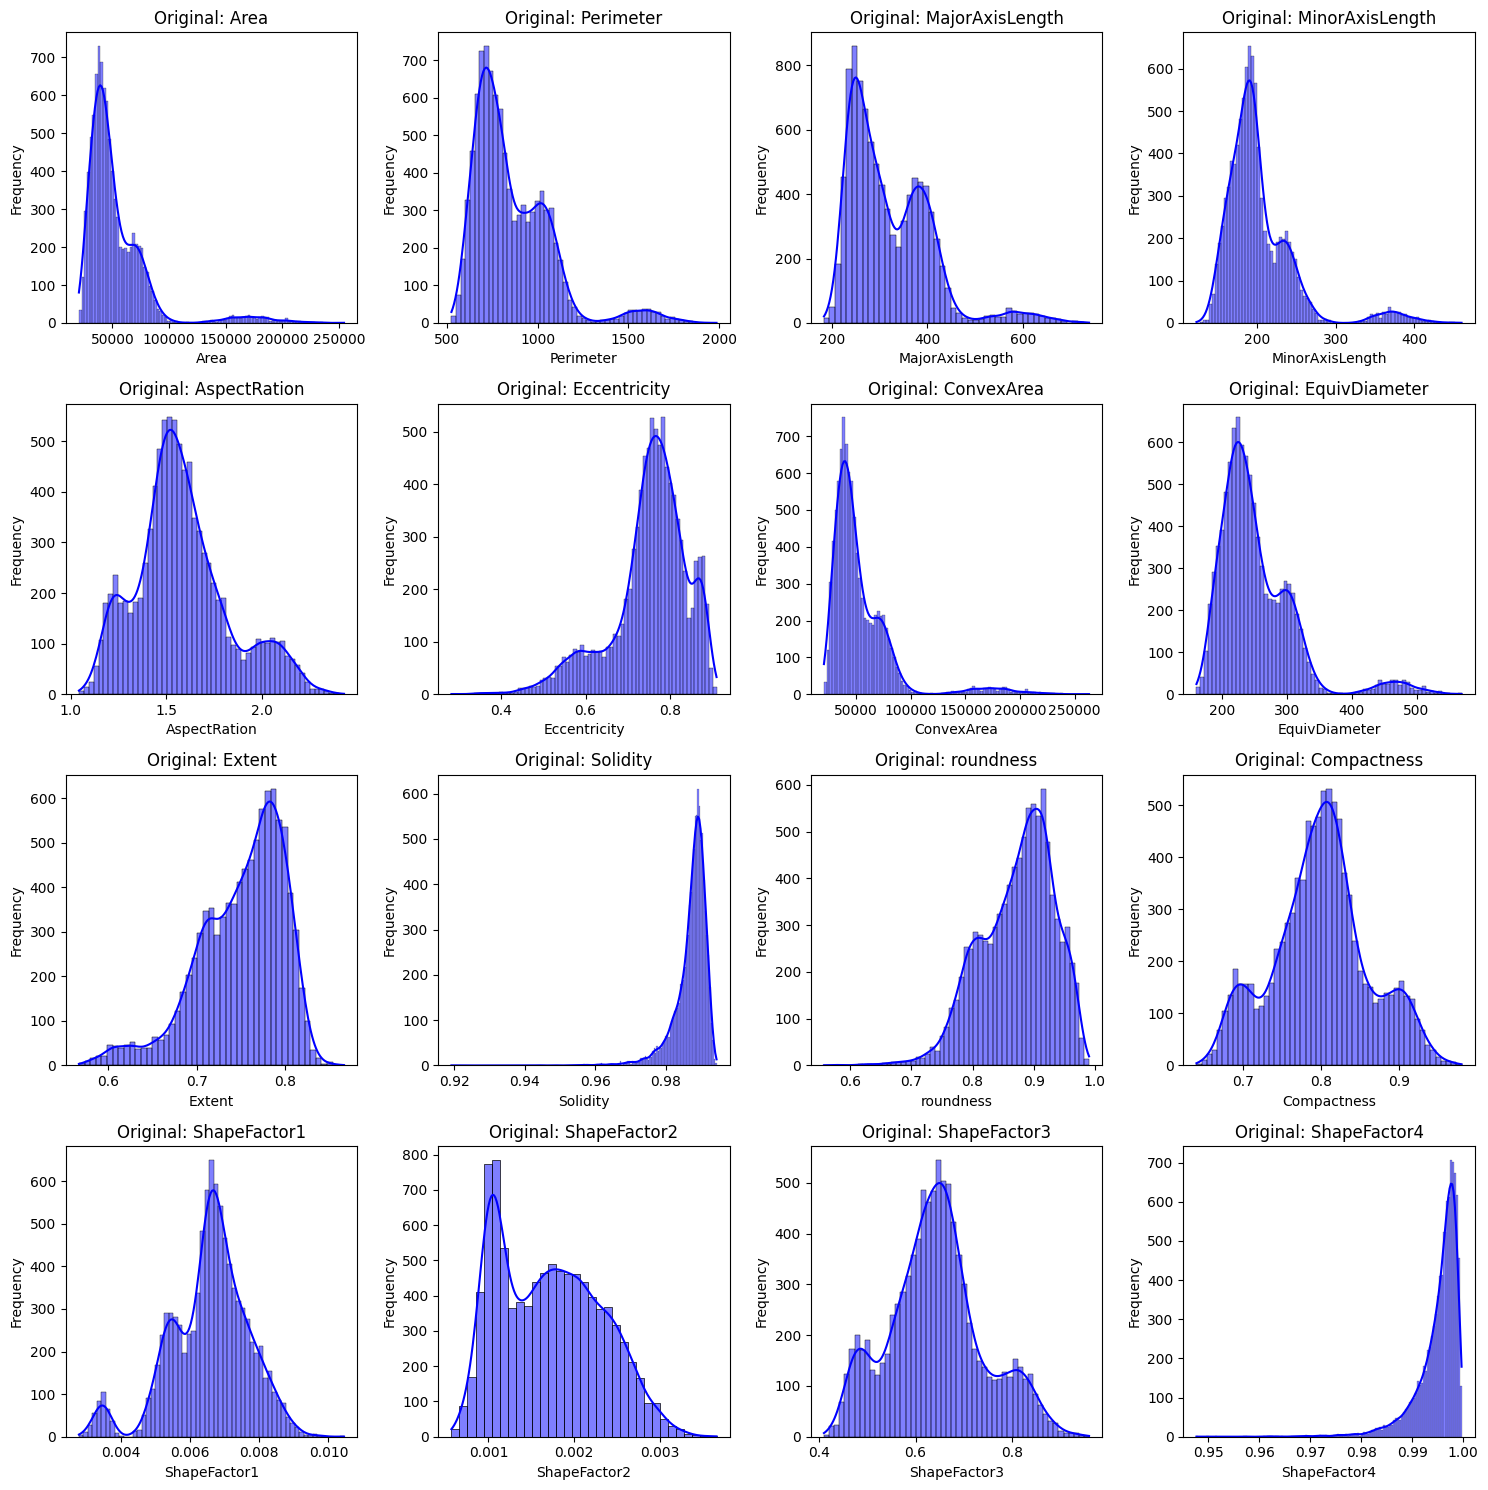

In [66]:
#Create a figure to hold all subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

# Step 1: Plot the original data (before normalization)
for i, col in enumerate(X_train.columns):
    # Plot histograms of original data (before normalization)
    sns.histplot(X_train[col], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Original: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Ensure there's no overlap between subplots
plt.show()


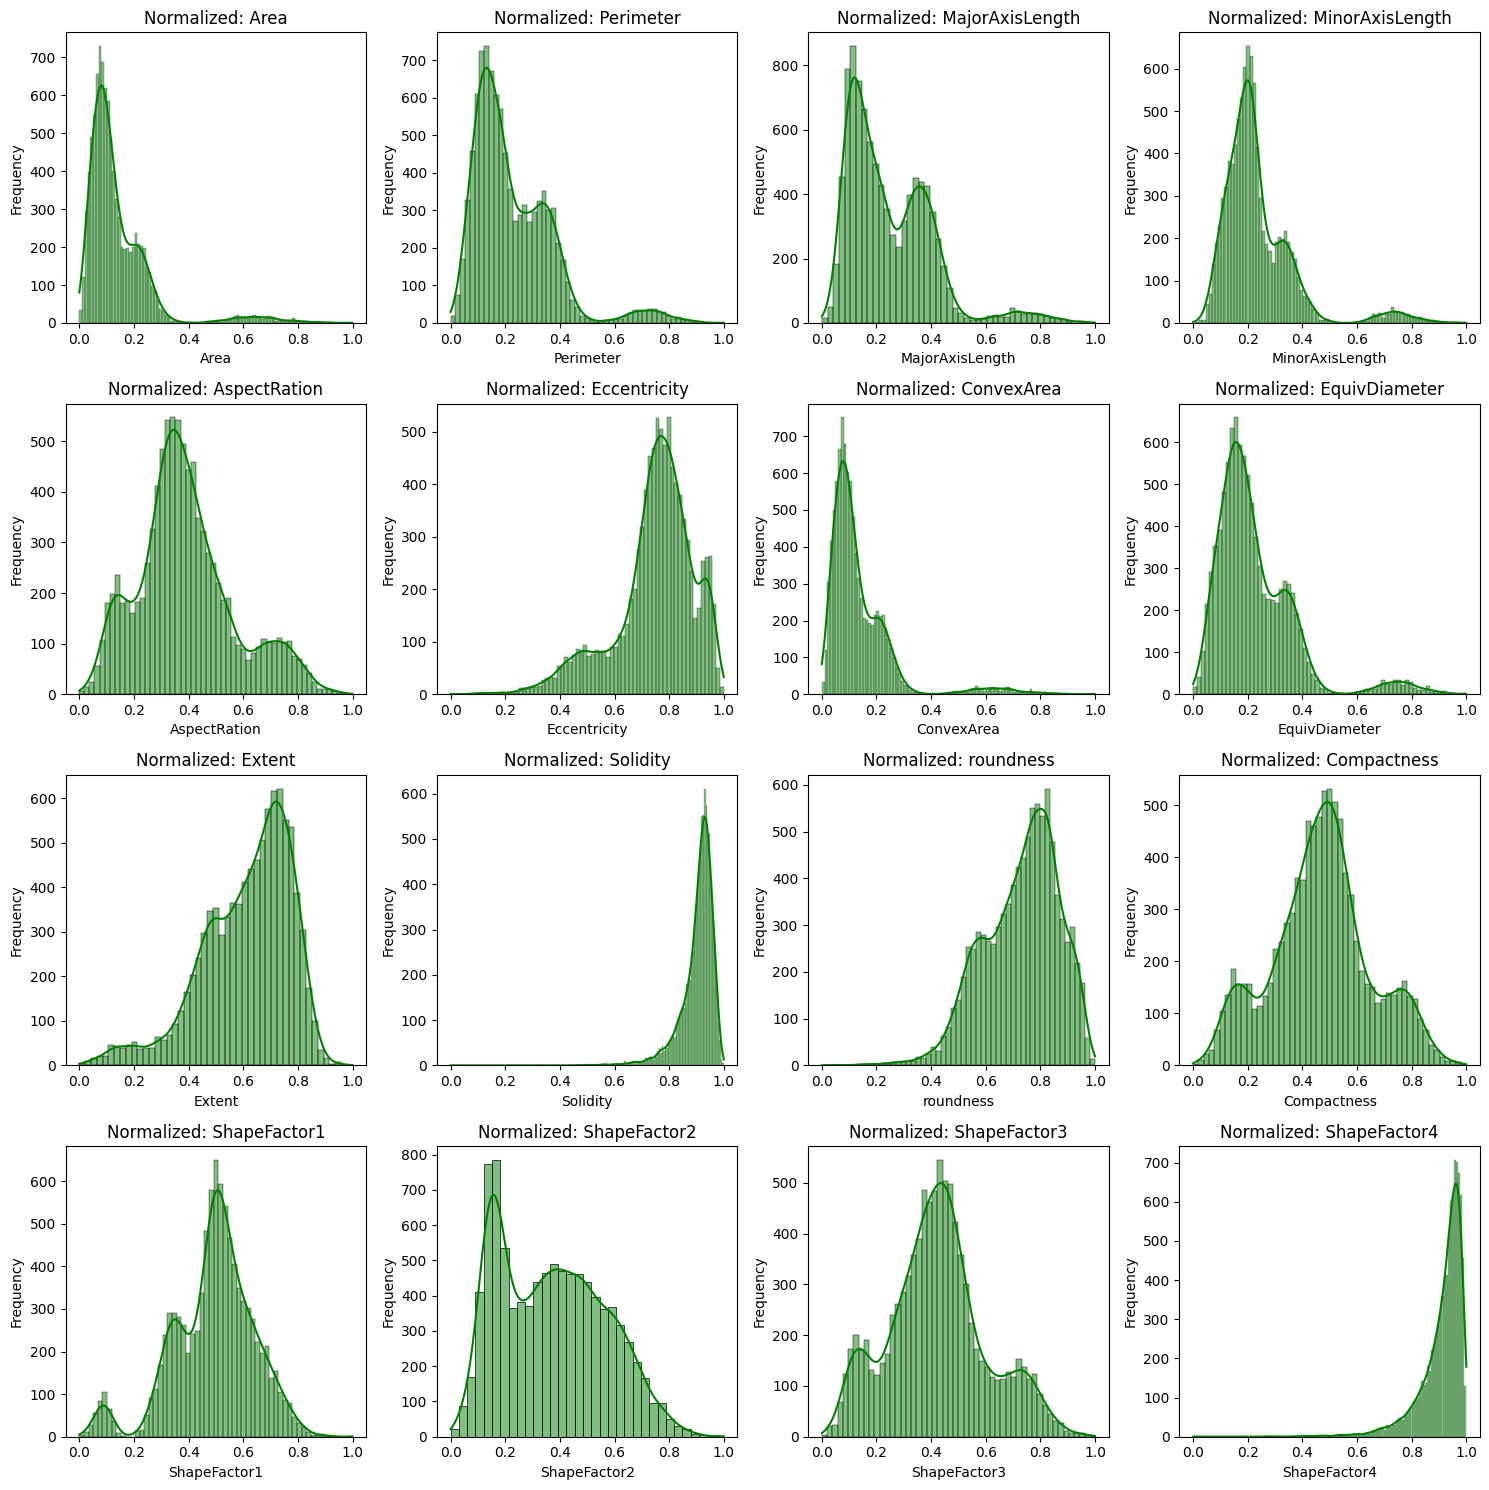

In [67]:
scaler = MinMaxScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Create a new figure to hold all subplots for normalized data
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# Flatten the axes array again for easy iteration
axes = axes.flatten()

# Plot histograms of normalized data
for i, col in enumerate(X_train.columns):
    sns.histplot(X_train_normalized[col], kde=True, color='green', ax=axes[i])
    axes[i].set_title(f'Normalized: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Ensure there's no overlap between subplots
plt.show()

In [68]:
"""
If the correlation coefficient of numerous independent variables is strong (>0.8), 
multicollinearity might affect the estimation of the dependent variables and the 
interpretation of the logistic regression model's independent coefficients.
"""

"\nIf the correlation coefficient of numerous independent variables is strong (>0.8), \nmulticollinearity might affect the estimation of the dependent variables and the \ninterpretation of the logistic regression model's independent coefficients.\n"

# make a log transform variable

In [76]:
X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
3812,203296,1716.579,627.512493,416.805357,1.505529,0.747539,205470,508.767635,0.765018,0.989419,0.866984,0.810769,0.003087,0.000823,0.657346,0.989654
6658,55382,922.802,367.797711,193.384583,1.901898,0.850614,55970,265.545763,0.703532,0.989494,0.817262,0.721989,0.006641,0.001113,0.521268,0.991398
1883,47447,785.622,267.906122,225.671357,1.187152,0.538927,47852,245.787300,0.765966,0.991536,0.966032,0.917438,0.005646,0.002468,0.841693,0.999217
3725,184936,1622.171,621.616973,380.363366,1.634271,0.790940,186576,485.250274,0.749363,0.991210,0.883157,0.780626,0.003361,0.000770,0.609377,0.995887
6435,53544,905.381,361.843023,190.055419,1.903882,0.850952,54466,261.102160,0.649680,0.983072,0.820839,0.721590,0.006758,0.001130,0.520692,0.991335


In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9527 entries, 3812 to 12706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             9527 non-null   int64  
 1   Perimeter        9527 non-null   float64
 2   MajorAxisLength  9527 non-null   float64
 3   MinorAxisLength  9527 non-null   float64
 4   AspectRation     9527 non-null   float64
 5   Eccentricity     9527 non-null   float64
 6   ConvexArea       9527 non-null   int64  
 7   EquivDiameter    9527 non-null   float64
 8   Extent           9527 non-null   float64
 9   Solidity         9527 non-null   float64
 10  roundness        9527 non-null   float64
 11  Compactness      9527 non-null   float64
 12  ShapeFactor1     9527 non-null   float64
 13  ShapeFactor2     9527 non-null   float64
 14  ShapeFactor3     9527 non-null   float64
 15  ShapeFactor4     9527 non-null   float64
dtypes: float64(14), int64(2)
memory usage: 1.2 MB


In [72]:
def log_transform_columns(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = np.log(df[column])
    return df

In [78]:
train_cols_to_transform=['Area', 'Perimeter', 'MaxisAxisLength', 'MinorAxisLength', 'AspectRation',
                         'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
                         'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
                         'ShapeFactor3', 'ShapeFactor4']

X_train_log = log_transform_columns(X_train, train_cols_to_transform)

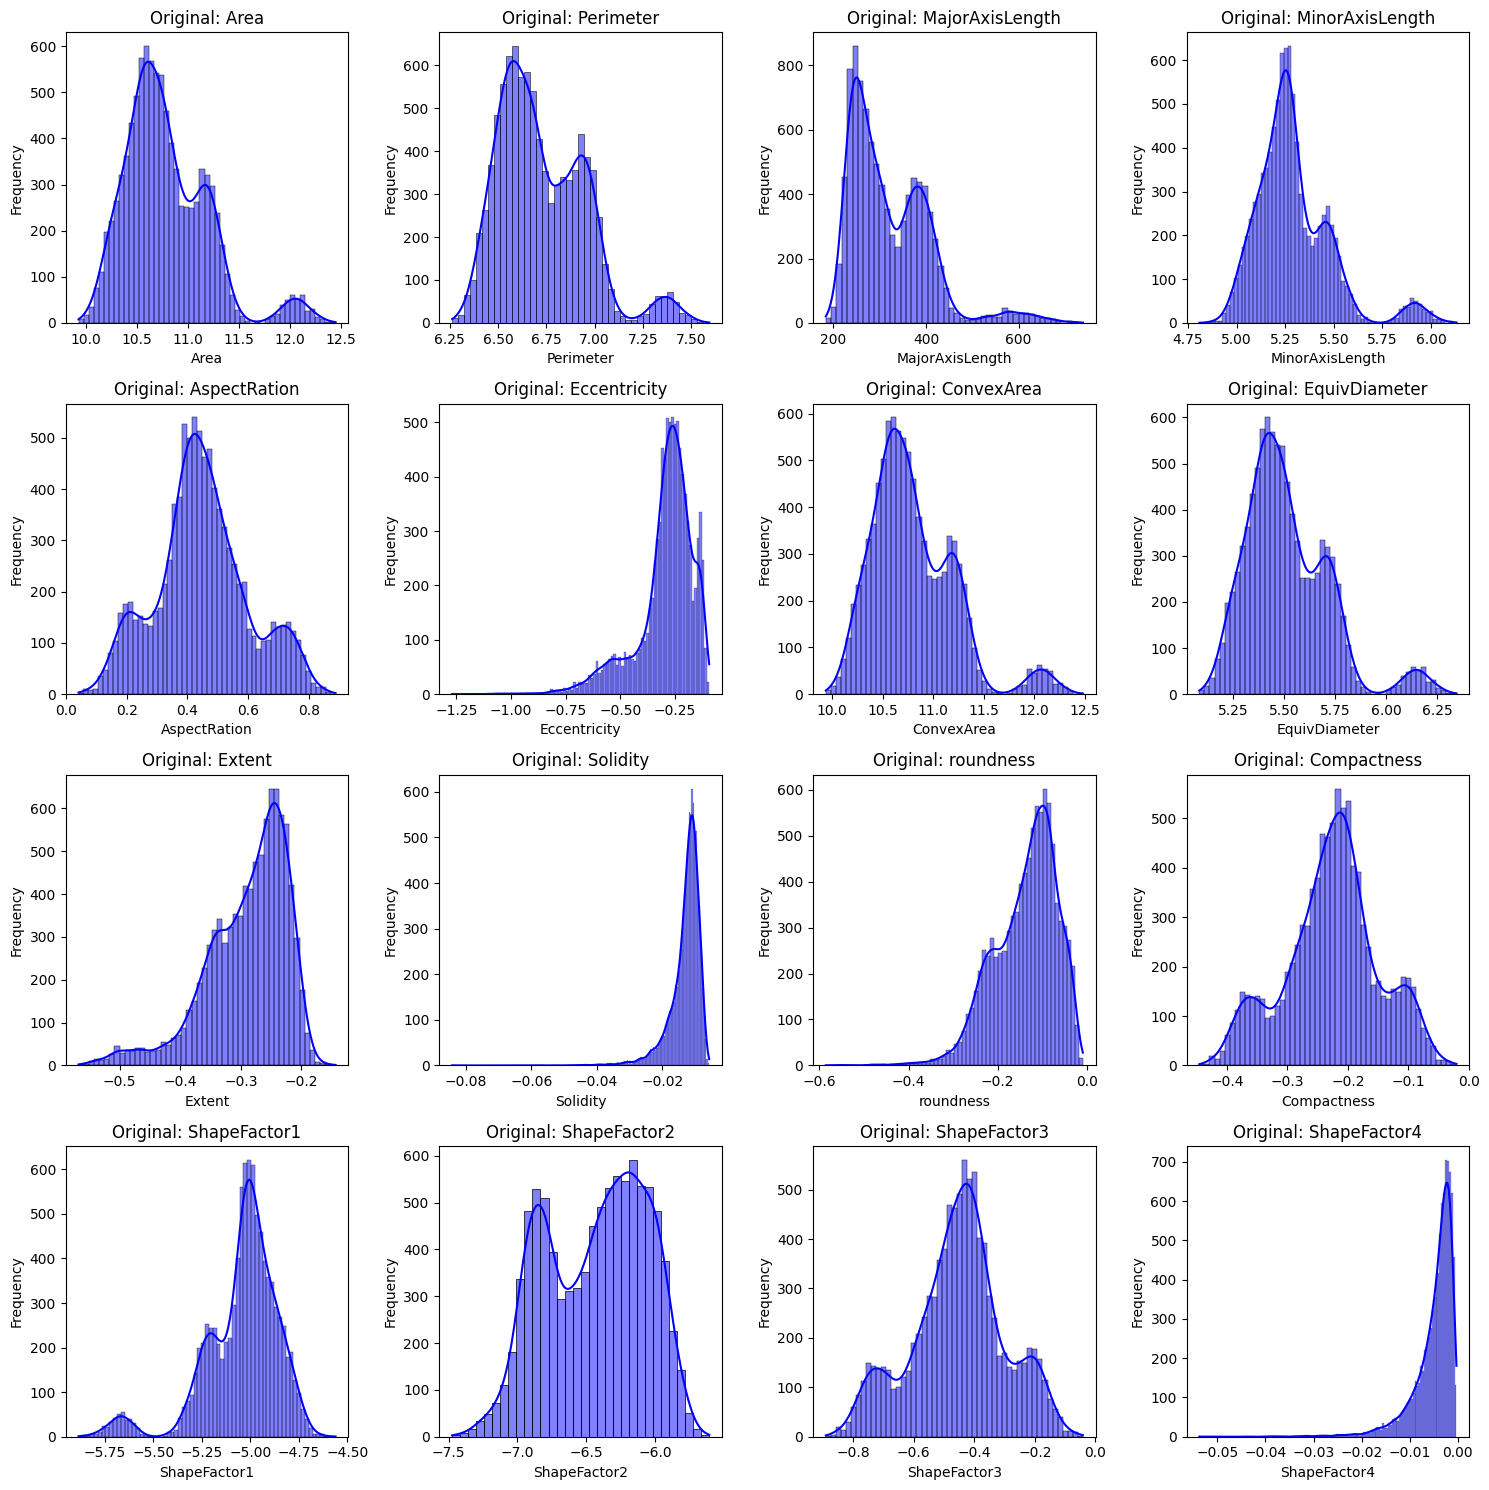

In [81]:
#Create a figure to hold all subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

# Step 1: Plot the original data (before normalization)
for i, col in enumerate(X_train.columns):
    # Plot histograms of original data (before normalization)
    sns.histplot(X_train[col], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Original: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Ensure there's no overlap between subplots
plt.show()



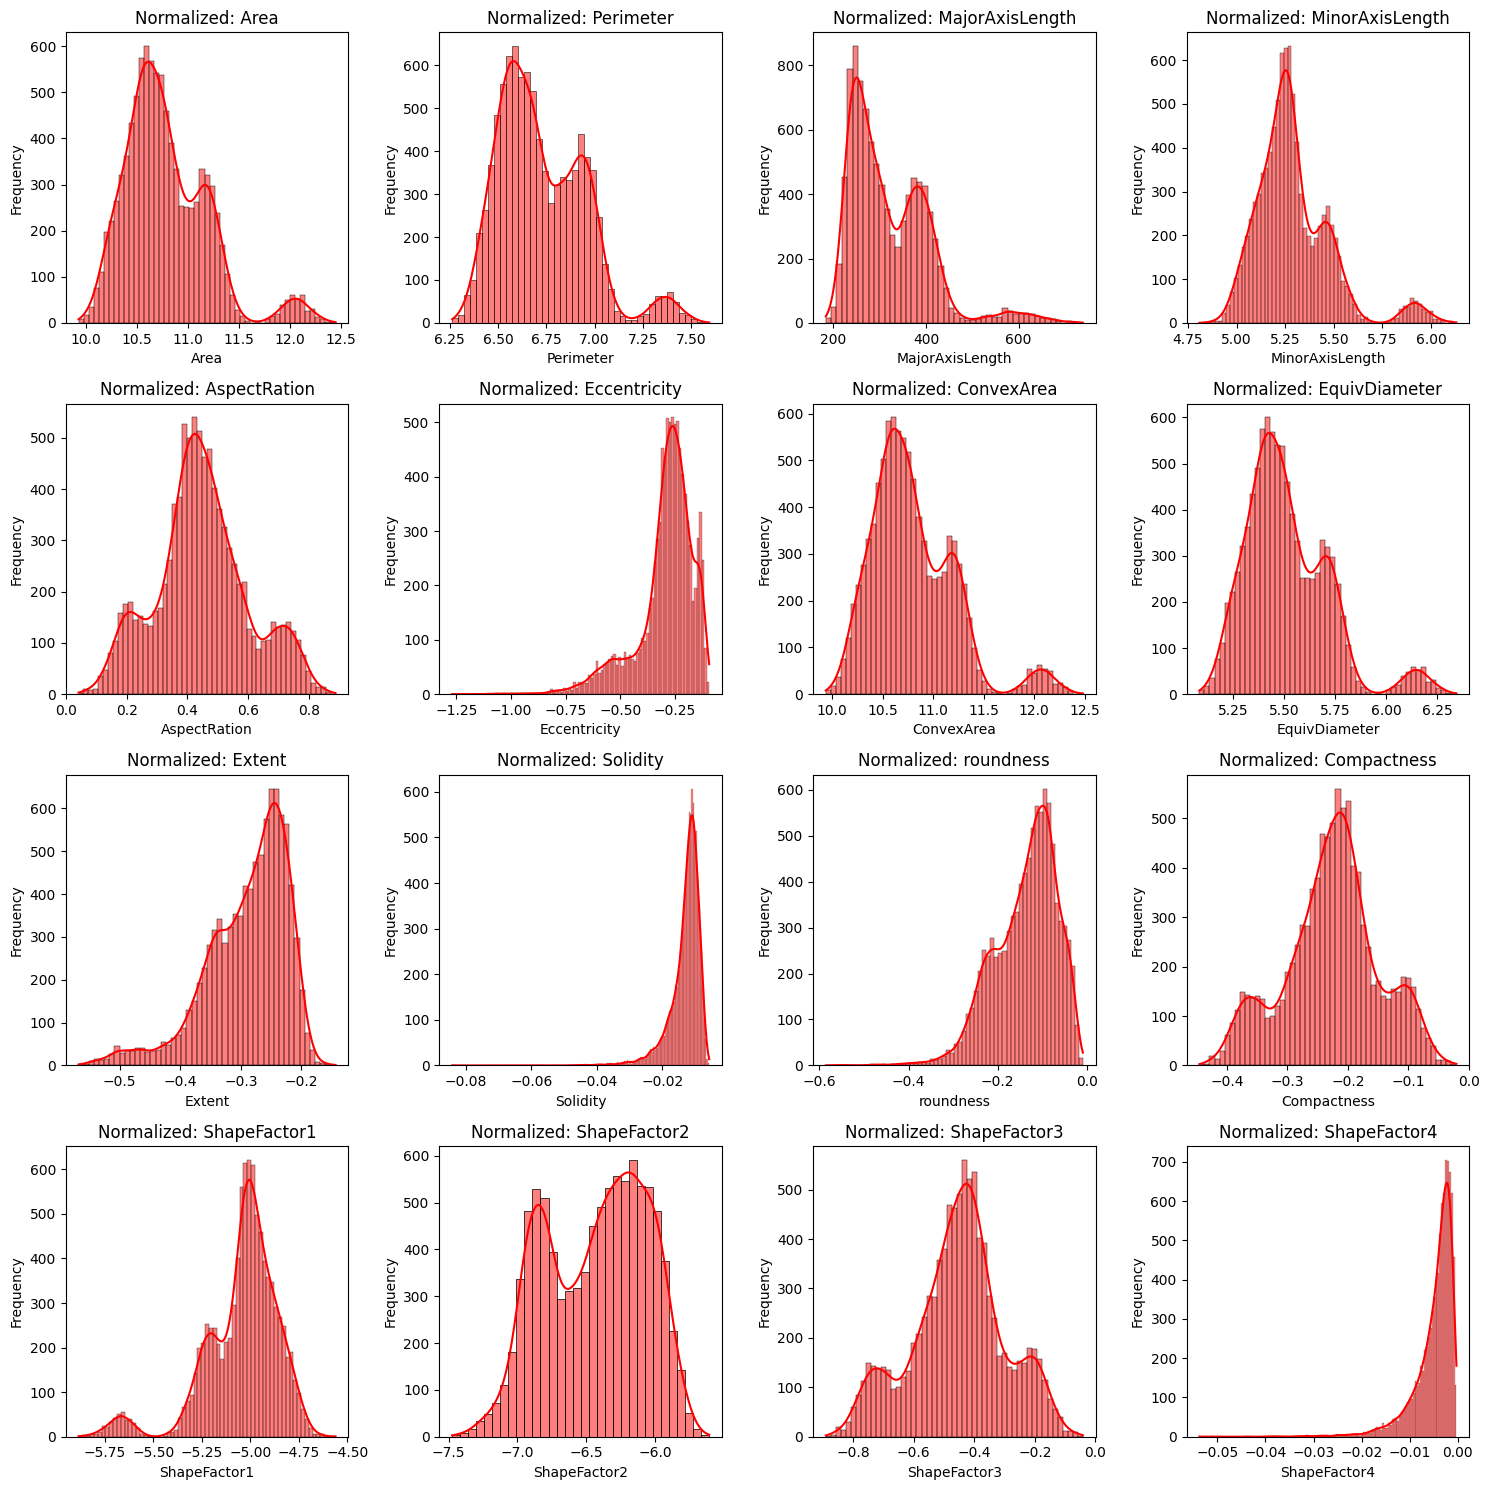

In [80]:
scaler = MinMaxScaler()
X_train_logged= pd.DataFrame(scaler.fit_transform(X_train_log), columns=X_train_log.columns)

# Create a new figure to hold all subplots for normalized data
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# Flatten the axes array again for easy iteration
axes = axes.flatten()

# Plot histograms of normalized data
for i, col in enumerate(X_train_log.columns):
    sns.histplot(X_train_log[col], kde=True, color='red', ax=axes[i])
    axes[i].set_title(f'Normalized: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Ensure there's no overlap between subplots
plt.show()

In [75]:
X_train_log_norm.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.247350,-0.203370,0.799467,-0.137541,-1.096919,-0.301015,-0.272121,-0.160754,-0.412170,-0.068280,-0.335583,-0.688645,-3.213175,-2.497378,-0.798585,-0.214792
1,-1.901897,-1.300008,0.331731,-1.561242,-0.479010,-0.101421,-1.927833,-1.364297,-0.783224,-0.067212,-0.510270,-1.426052,-0.686260,-1.736939,-1.599114,-0.174078
2,-2.159322,-1.722542,0.151830,-1.185847,-2.257837,-0.893569,-2.189279,-1.574321,-0.407404,-0.038558,-0.058494,-0.202056,-0.983968,-0.488791,-0.241075,-0.009505
3,-0.353151,-0.285895,0.788850,-0.269735,-0.851840,-0.212074,-0.379982,-0.230824,-0.494389,-0.043083,-0.284762,-0.883580,-2.576881,-2.729518,-1.014508,-0.076312
4,-1.955900,-1.344759,0.321007,-1.609355,-0.476706,-0.100827,-1.971391,-1.407834,-1.283233,-0.163089,-0.496633,-1.430965,-0.656484,-1.706117,-1.604321,-0.175511
